## ***Importamos***

In [3]:
!pip install keras==2.12.0
!pip uninstall tensorflow -y
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)


In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import sklearn as sk
import random

from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV

import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
import joblib
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

importamos los dataframes original para los #ids

In [5]:
df_hotels_train_original = pd.read_csv('hotels_train.csv')

In [6]:
df_hotels_test_original = pd.read_csv('hotels_test.csv')

In [7]:
df_hotels_train_limpio = pd.read_csv('df_hotel_train_clean.csv')
df_hotels_test_limpio = pd.read_csv('df_hotel_test_clean.csv')

realizamos una paticion del 20% del dataframe de entrenamiento.

In [8]:
ds_trabajo_x = df_hotels_train_limpio.drop(["is_canceled"], axis='columns', inplace=False)
ds_trabajo_y = df_hotels_train_limpio['is_canceled'].copy()
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size = 0.20, random_state = 28)

In [9]:
x_train.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'reserved_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_days', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_BEL',
       'country_BRA', 'country_CHE', 'country_CHN', 'country_CN',
       'country_DEU', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_IRL', 'country_ISR', 'country_ITA', 'country_NLD',
       'country_NOR', 'country_POL', 'country_PRT', 'country_RUS',
       'country_SWE', 'country_USA', 'country_other',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'marke

In [9]:
valoresNumericos = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
                    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                    'reserved_room_type', 'booking_changes', 'agent','days_in_waiting_list', 'adr',
                    'required_car_parking_spaces', 'total_of_special_requests', 'total_days']

In [10]:
sscaler=StandardScaler()
sscaler.fit(pd.DataFrame(x_train[valoresNumericos]))

StandardScaler()

In [11]:
x_train_transform_1 = sscaler.transform(pd.DataFrame(x_train[valoresNumericos]))
x_test_transform_1 = sscaler.transform(pd.DataFrame(x_test[valoresNumericos]))
df_hotels_testeo_transform_1 = sscaler.transform(pd.DataFrame(df_hotels_test_limpio[valoresNumericos]))

In [12]:
x_train_escalado = x_train.copy()
x_test_escalado = x_test.copy()
df_testeo_escalado = df_hotels_test_limpio.copy()

In [13]:
for i in range(len(valoresNumericos)):
  x_train_escalado[valoresNumericos[i]] = x_train_transform_1[:,i]
  x_test_escalado[valoresNumericos[i]] = x_test_transform_1[:,i]
  df_testeo_escalado[valoresNumericos[i]] = df_hotels_testeo_transform_1[:,i]

In [14]:
from keras.layers.serialization import activation

## ***Red Neuronal 4***

In [16]:
d_in = len(x_train_escalado.columns)
cant_clases = 1
model_hotels_1 = keras.Sequential([
      keras.layers.Dense(10, input_shape = (d_in,), activation = 'relu'),
      keras.layers.Dense(cant_clases, activation = 'sigmoid')
])

In [17]:
model_hotels_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                600       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_hotels_1.compile(
  optimizer=keras.optimizers.Nadam(learning_rate=0.01),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)

cant_epochs_hotels=50
model1_hotels_historia = model_hotels_1.fit(x_train_escalado, y_train,
                                                epochs=cant_epochs_hotels,
                                                batch_size=20,verbose=False)

373/373 [==============================] - 1s 1ms/step


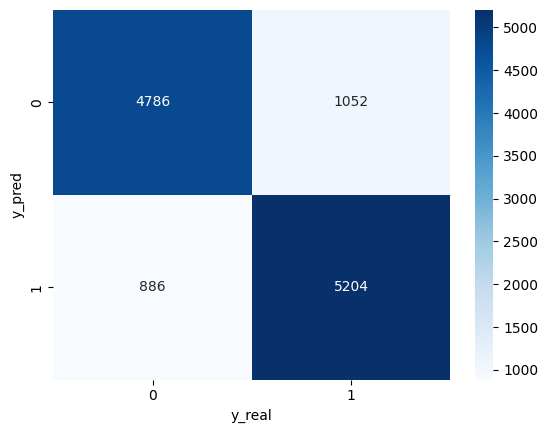

In [59]:
y_pred = model_hotels_1.predict(x_test_escalado)
y_predic_cat_1 = np.where(y_pred>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_1, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt = 'g')
plt.show()

In [60]:
accuracy= accuracy_score(y_test, y_predic_cat_1)
recall = recall_score(y_test, y_predic_cat_1)
f1 = f1_score(y_test, y_predic_cat_1)
precision= precision_score(y_test, y_predic_cat_1)

print('Accuracy: ' + str(accuracy))
print('Recall: ' + str(recall))
print('f1: ' + str(f1))
print('precision: ' + str(precision))

Accuracy: 0.8375251509054326
Recall: 0.8545155993431856
f1: 0.8430260813218856
precision: 0.8318414322250639


## ***Red Neuronal 5***

In [20]:
d_in = len(x_train_escalado.columns)
cant_clases = 1
model_hotels_2 = keras.Sequential([
      keras.layers.Dense(15, input_shape = (d_in,), activation = 'relu'),
      keras.layers.Dense(25, activation = 'relu'),
      keras.layers.Dense(37, activation = 'relu'),
      keras.layers.Dense(46, activation = 'relu'),
      keras.layers.Dense(58, activation = 'relu'),
      keras.layers.Dense(68, activation = 'relu'),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(88, input_shape = (d_in,), activation = 'relu'),
      keras.layers.Dense(cant_clases, activation = 'sigmoid')
])

In [21]:
model_hotels_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                900       
                                                                 
 dense_9 (Dense)             (None, 25)                400       
                                                                 
 dense_10 (Dense)            (None, 37)                962       
                                                                 
 dense_11 (Dense)            (None, 46)                1748      
                                                                 
 dense_12 (Dense)            (None, 58)                2726      
                                                                 
 dense_13 (Dense)            (None, 68)                4012      
                                                                 
 dropout_1 (Dropout)         (None, 68)               

In [22]:
model_hotels_2.compile(
  optimizer=keras.optimizers.Nadam(learning_rate=0.01),
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['AUC'],
)

cant_epochs_hotels=90
model2_hotels_historia = model_hotels_2.fit(x_train_escalado, y_train,
                                                epochs=cant_epochs_hotels,
                                                batch_size=35,verbose=False)

373/373 [==============================] - 1s 1ms/step


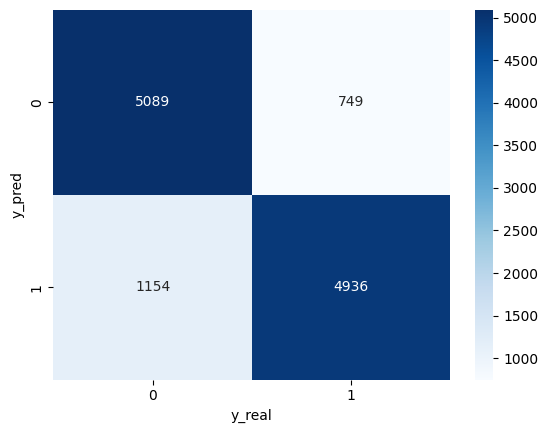

In [23]:
y_pred2 = model_hotels_2.predict(x_test_escalado)
y_predic_cat_2 = np.where(y_pred2>0.5,1,0)

ds_validacion=pd.DataFrame(y_predic_cat_2, y_test).reset_index()
ds_validacion.columns=['y_pred','y_real']

tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
grf=sns.heatmap(tabla,annot=True, cmap = 'Blues', fmt = 'g')
plt.show()

In [24]:
accuracy= accuracy_score(y_test, y_predic_cat_2)
recall = recall_score(y_test, y_predic_cat_2)
f1 = f1_score(y_test, y_predic_cat_2)
precision= precision_score(y_test, y_predic_cat_2)

print('Accuracy: ' + str(accuracy))
print('Recall: ' + str(recall))
print('f1: ' + str(f1))
print('precision: ' + str(precision))

Accuracy: 0.8404594232059021
Recall: 0.8105090311986863
f1: 0.8383864118895965
precision: 0.868249780123131


In [25]:
df_resultados_pred = pd.DataFrame.from_records(y_predic_cat_2, columns = ['resultado'])
df_summision = pd.DataFrame({'id': df_hotels_test_original['id'], 'is_canceled':df_resultados_pred['resultado']})
df_summision.to_csv('red_neuronal_8.csv', index = False)
df_summision

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1.0
1,aba9aac2-4495-4645-a60e-90328713c999,0.0
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,1.0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,0.0
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1.0
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,NaN
26531,11e19741-bd28-4459-8ea3-184f1664000f,NaN
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,NaN
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,NaN


## ***Red Neuronal 6***

In [75]:
from keras.wrappers.scikit_learn import KerasClassifier


In [76]:
# Create the sklearn model for the network

def create_model(learning_rate=0.1, activation='rule',hidden_layers=2, output=2):
    model = keras.Sequential()
    model.add(keras.layers.Dense(8, activation=activation, input_shape=(d_in,)))
    for i in range(hidden_layers):
      model.add(keras.layers.Dense(output, activation=activation, input_shape=(d_in,)))
    model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=(d_in,)))
    model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      # metricas para ir calculando en cada iteracion o batch
      metrics=['AUC'],
    )

    return model

In [77]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [81]:
param_grid = {
               "hidden_layers": [1, 8, 15, 20, 28, 38],
               "output": [1, 8, 15, 20, 28, 35, 45],
               "batch_size": [50, 100, 150],
               "epochs": [40, 80, 120, 180],
               "activation": ['sigmoid', 'softmax', 'softplus', 'relu', 'elu']
}

In [86]:
metricas = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

In [87]:
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metricas, refit=False,n_jobs=-2, cv=5)

In [ ]:
gs_fit = gs.fit(x_train_escalado, y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
764/764 [==============================] - 2s 3ms/step - loss: 0.4261 - auc: 0.8838
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.4146 - auc: 0.8887
Epoch 4/40
764/764 [==============================] - 3s 3ms/step - loss: 0.4074 - auc: 0.8916
Epoch 5/40
764/764 [==============================] - 2s 2ms/step - loss: 0.4003 - auc: 0.8948
Epoch 6/40
764/764 [==============================] - 2s 2ms/step - loss: 0.3934 - auc: 0.8981
Epoch 7/40
764/764 [==============================] - 2s 2ms/step - loss: 0.3869 - auc: 0.9013
Epoch 8/40
764/764 [==============================] - 2s 2ms/step - loss: 0.3806 - auc: 0.9043
Epoch 9/40
764/764 [==============================] - 2s 2ms/step - loss: 0.3754 - auc: 0.9069
Epoch 10/40
764/764 [==============================] - 2s 3ms/step - loss: 0.3711 - auc: 0.9089
Epoch 11/40
764/764 [==============================] - 3s 3ms/step - loss: 0.3677 - auc: 0.910

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 3ms/step
Epoch 1/40
764/764 [==============================] - 6s 4ms/step - loss: 0.6957 - auc: 0.4973
Epoch 2/40
764/764 [==============================] - 3s 3ms/step - loss: 0.6931 - auc: 0.5018
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.4959
Epoch 4/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.5004
Epoch 5/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4976
Epoch 6/40
764/764 [==============================] - 3s 3ms/step - loss: 0.6932 - auc: 0.4991
Epoch 7/40
764/764 [==============================] - 3s 3ms/step - loss: 0.6932 - auc: 0.4930
Epoch 8/40
764/764 [==============================] - 3s 3ms/step - loss: 0.6932 - auc: 0.5009
Epoch 9/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4985
Epoch 10/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6931 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 6s 4ms/step - loss: 0.6934 - auc: 0.4923
Epoch 2/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6933 - auc: 0.4999
Epoch 3/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6933 - auc: 0.4988
Epoch 4/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6933 - auc: 0.4983
Epoch 5/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.5027
Epoch 6/40
764/764 [==============================] - 3s 3ms/step - loss: 0.6932 - auc: 0.5047
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6933 - auc: 0.4979
Epoch 8/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6934 - auc: 0.4951
Epoch 9/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6933 - auc: 0.4984
Epoch 10/40
764/764 [==============================] - 3s 3ms/step - loss: 0.6933 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 7s 5ms/step - loss: 0.6937 - auc: 0.4918
Epoch 2/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6936 - auc: 0.4997
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6935 - auc: 0.4968
Epoch 4/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6936 - auc: 0.4970
Epoch 5/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6934 - auc: 0.5031
Epoch 6/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6933 - auc: 0.5050
Epoch 7/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6934 - auc: 0.4991
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6935 - auc: 0.4962
Epoch 9/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6934 - auc: 0.4987
Epoch 10/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6934 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 3ms/step
Epoch 1/40
764/764 [==============================] - 7s 4ms/step - loss: 0.6942 - auc: 0.4915
Epoch 2/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6937 - auc: 0.4997
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6935 - auc: 0.4976
Epoch 4/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6936 - auc: 0.4966
Epoch 5/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6934 - auc: 0.5028
Epoch 6/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6934 - auc: 0.5050
Epoch 7/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6935 - auc: 0.4988
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6936 - auc: 0.4961
Epoch 9/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6935 - auc: 0.4980
Epoch 10/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6934 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 8s 4ms/step - loss: 0.6942 - auc: 0.4920
Epoch 2/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6939 - auc: 0.5011
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6937 - auc: 0.4977
Epoch 4/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6939 - auc: 0.4970
Epoch 5/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0.5026
Epoch 6/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6935 - auc: 0.5044
Epoch 7/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6935 - auc: 0.4990
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6937 - auc: 0.4955
Epoch 9/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6936 - auc: 0.4976
Epoch 10/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 8s 6ms/step - loss: 0.6943 - auc: 0.4918
Epoch 2/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6940 - auc: 0.5011
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6937 - auc: 0.4976
Epoch 4/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6938 - auc: 0.4969
Epoch 5/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0.5024
Epoch 6/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6935 - auc: 0.5043
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0.4987
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6937 - auc: 0.4958
Epoch 9/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6936 - auc: 0.4976
Epoch 10/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6935 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 8s 7ms/step - loss: 0.6948 - auc: 0.4933
Epoch 2/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6941 - auc: 0.5020
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6938 - auc: 0.4981
Epoch 4/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6940 - auc: 0.4967
Epoch 5/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6936 - auc: 0.5026
Epoch 6/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6936 - auc: 0.5028
Epoch 7/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6937 - auc: 0.4985
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6938 - auc: 0.4969
Epoch 9/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6937 - auc: 0.4975
Epoch 10/40
764/764 [==============================] - 6s 7ms/step - loss: 0.6936 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 8s 5ms/step - loss: 0.6933 - auc: 0.5003
Epoch 2/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6932 - auc: 0.5011
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.5014
Epoch 4/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.4977
Epoch 5/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.5017
Epoch 6/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6932 - auc: 0.4982
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4976
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.4971
Epoch 9/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6932 - auc: 0.4983
Epoch 10/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6932 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 11s 6ms/step - loss: 0.7222 - auc: 0.4986
Epoch 2/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6934 - auc: 0.4931
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.4976
Epoch 4/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.4998
Epoch 5/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6932 - auc: 0.4982
Epoch 6/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4990
Epoch 7/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.4949
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.5007
Epoch 9/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.4986
Epoch 10/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6931 - auc: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 8s 6ms/step - loss: 0.6971 - auc: 0.4973
Epoch 2/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6933 - auc: 0.5002
Epoch 3/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.5001
Epoch 4/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6933 - auc: 0.4995
Epoch 5/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6932 - auc: 0.5042
Epoch 6/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6932 - auc: 0.5041
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6933 - auc: 0.4979
Epoch 8/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6933 - auc: 0.4951
Epoch 9/40
764/764 [==============================] - 3s 4ms/step - loss: 0.6933 - auc: 0.4973
Epoch 10/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6932 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 9s 7ms/step - loss: 0.6936 - auc: 0.4905
Epoch 2/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6935 - auc: 0.4999
Epoch 3/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6934 - auc: 0.4979
Epoch 4/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0.4979
Epoch 5/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6933 - auc: 0.5025
Epoch 6/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6933 - auc: 0.5052
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6934 - auc: 0.4989
Epoch 8/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0.4963
Epoch 9/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6934 - auc: 0.4975
Epoch 10/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6933 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 9s 6ms/step - loss: 0.6937 - auc: 0.4905
Epoch 2/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6937 - auc: 0.4997
Epoch 3/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0.4975
Epoch 4/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6936 - auc: 0.4967
Epoch 5/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6934 - auc: 0.5032
Epoch 6/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6934 - auc: 0.5047
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6935 - auc: 0.4991
Epoch 8/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6936 - auc: 0.4960
Epoch 9/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6935 - auc: 0.4987
Epoch 10/40
764/764 [==============================] - 6s 7ms/step - loss: 0.6934 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 3ms/step
Epoch 1/40
764/764 [==============================] - 8s 5ms/step - loss: 0.6946 - auc: 0.4921
Epoch 2/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6939 - auc: 0.5013
Epoch 3/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6937 - auc: 0.4973
Epoch 4/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6939 - auc: 0.4965
Epoch 5/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6936 - auc: 0.5024
Epoch 6/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6936 - auc: 0.5033
Epoch 7/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6936 - auc: 0.4988
Epoch 8/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6938 - auc: 0.4969
Epoch 9/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6937 - auc: 0.4980
Epoch 10/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6936 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 11s 8ms/step - loss: 0.6945 - auc: 0.4922
Epoch 2/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6940 - auc: 0.5016
Epoch 3/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6937 - auc: 0.4973
Epoch 4/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6940 - auc: 0.4968
Epoch 5/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6936 - auc: 0.5024
Epoch 6/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6936 - auc: 0.5033
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6936 - auc: 0.4991
Epoch 8/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6938 - auc: 0.4968
Epoch 9/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6937 - auc: 0.4978
Epoch 10/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6936 - auc: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 3ms/step
Epoch 1/40
764/764 [==============================] - 9s 5ms/step - loss: 0.6950 - auc: 0.4935
Epoch 2/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6942 - auc: 0.5017
Epoch 3/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6939 - auc: 0.4977
Epoch 4/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6941 - auc: 0.4973
Epoch 5/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6937 - auc: 0.5020
Epoch 6/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6937 - auc: 0.5024
Epoch 7/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6937 - auc: 0.4986
Epoch 8/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6938 - auc: 0.4969
Epoch 9/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6937 - auc: 0.4971
Epoch 10/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6936 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 2ms/step
Epoch 1/40
764/764 [==============================] - 8s 6ms/step - loss: 0.6942 - auc: 0.5026
Epoch 2/40
764/764 [==============================] - 7s 9ms/step - loss: 0.6938 - auc: 0.4992
Epoch 3/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6937 - auc: 0.4962
Epoch 4/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6937 - auc: 0.5006
Epoch 5/40
764/764 [==============================] - 7s 9ms/step - loss: 0.6936 - auc: 0.5015
Epoch 6/40
764/764 [==============================] - 7s 10ms/step - loss: 0.6936 - auc: 0.4998
Epoch 7/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6937 - auc: 0.4949
Epoch 8/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6935 - auc: 0.5035
Epoch 9/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6936 - auc: 0.5012
Epoch 10/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6936 - auc: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 4ms/step
Epoch 1/40
764/764 [==============================] - 12s 6ms/step - loss: 0.6980 - auc: 0.4984
Epoch 2/40
764/764 [==============================] - 7s 9ms/step - loss: 0.6932 - auc: 0.5012
Epoch 3/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6932 - auc: 0.5014
Epoch 4/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4975
Epoch 5/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6932 - auc: 0.5018
Epoch 6/40
764/764 [==============================] - 6s 7ms/step - loss: 0.6932 - auc: 0.4987
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4980
Epoch 8/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6932 - auc: 0.4969
Epoch 9/40
764/764 [==============================] - 7s 9ms/step - loss: 0.6932 - auc: 0.4985
Epoch 10/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6932 - auc: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 3ms/step
Epoch 1/40
764/764 [==============================] - 9s 6ms/step - loss: 0.6980 - auc: 0.4982
Epoch 2/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6932 - auc: 0.5014
Epoch 3/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6932 - auc: 0.4955
Epoch 4/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4998
Epoch 5/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6932 - auc: 0.4979
Epoch 6/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6932 - auc: 0.4989
Epoch 7/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.4938
Epoch 8/40
764/764 [==============================] - 4s 5ms/step - loss: 0.6932 - auc: 0.5000
Epoch 9/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6932 - auc: 0.4983
Epoch 10/40
764/764 [==============================] - 6s 8ms/step - loss: 0.6931 - auc: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


299/299 [==============================] - 1s 3ms/step
Epoch 1/40
764/764 [==============================] - 10s 5ms/step - loss: 0.6934 - auc: 0.4920
Epoch 2/40
764/764 [==============================] - 6s 7ms/step - loss: 0.6933 - auc: 0.4998
Epoch 3/40
764/764 [==============================] - 6s 7ms/step - loss: 0.6933 - auc: 0.4997
Epoch 4/40
764/764 [==============================] - 4s 6ms/step - loss: 0.6933 - auc: 0.4983
Epoch 5/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6932 - auc: 0.5034
Epoch 6/40
764/764 [==============================] - 7s 9ms/step - loss: 0.6932 - auc: 0.5042
Epoch 7/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6933 - auc: 0.4991
Epoch 8/40
764/764 [==============================] - 5s 6ms/step - loss: 0.6934 - auc: 0.4955
Epoch 9/40
764/764 [==============================] - 7s 9ms/step - loss: 0.6933 - auc: 0.4972
Epoch 10/40
764/764 [==============================] - 5s 7ms/step - loss: 0.6932 - auc: 

In [1]:
import joblib

In [ ]:
joblib.dump(gs_fit, 'redes.joblib')